# Logistic Regression Definition

Logistic regression is a statistical method used for binary classification tasks. It models the probability of a binary outcome (1/0, True/False, Yes/No) based on one or more independent variables (features). The logistic regression model uses the logistic function (also known as the sigmoid function) to map a linear combination of features to a value between 0 and 1, which represents the probability of the binary outcome.

The logistic function can be expressed as:


`h(X)=g(θ.T*X)`

`g(z)=1/(1+e^-z)`

Where:
- h(X) is the hypothesis function
- θ is the parameter vector.
- X is the feature vector.

During training, the model learns the optimal values of  by minimizing a cost function, typically the log loss (cross-entropy), to make accurate predictions. Logistic regression is widely used in various applications, including spam detection, medical diagnosis, and sentiment analysis.

## h(X) meaning

`h(X) is the estimated probability that y=1 on input x`

`h(X) = P(y=1 | X,θ)`

## --- Cost Function and Gradient Descent in Logistic Regression ---

We can't use simple MSE(mean squared error) function as cost function for logistic regression as here it acts like a non-convex function

- A `convex function` is one that assume to have a bowl like structure or 1 minima only

Since,logistic regression only takes discreate value and does not span in a continuos range like regression problem and hence gradient Descent can't minimze it here

# `--Cost-Function in Logistic regression--`
Cost function in logistic regression is defined as : 
    
    `J(θ)=(1/m)*∑ Cost(h(x),y)`

    `Cost(h(x),y)= -y*ln(h(x)) - (1-y)*ln(1-h(x))`


### -- Gradient Descent --

(repeat until conerge) {

        θi := θi - alpha*(d/dθi*(J(θ)))

    =>  θi := θi - alpha*(∑(h(x)-y).Xi)
}


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
df=pd.read_csv("./logistic-reg-sampleDataset.csv")
df.head()

,Feature1,Feature2,Target
0,2.5,1.2,0
1,3.9,2.8,0
2,1.4,1.3,1
3,4.6,3.5,0
4,3.1,2.4,1


In [3]:
# Extracting features and target-varialbes from the dataset
m=df.shape[0]
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape((m,1))
X[:5],y[:5]

(array([[2.5, 1.2],
        [3.9, 2.8],
        [1.4, 1.3],
        [4.6, 3.5],
        [3.1, 2.4]]),
 array([[0],
        [0],
        [1],
        [0],
        [1]], dtype=int64))

In [4]:
# Spliting Data for Training and testing
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((40, 2), (10, 2), (40, 1), (10, 1))

In [5]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, num_iters=100):
        self.learning_rate = learning_rate
        self.num_iters = num_iters

    def sigmoid(self,X):
        sig = 1/(1+np.exp(-(X @ self.theta)))
        return sig

    def fit(self, X, y):
        def updateThetas(X,y):
            y_hat = self.sigmoid(X)
            error = y_hat-y

            # Calculating Gradient
            gradient = (1/m)*(X.T.dot(error))

            # Updating thetas
            self.theta -= self.learning_rate*gradient

        m, n = X.shape
        if y.shape[0] != m:
            raise ValueError(
                f"Training and testing data should have same shape\nX-shape{x.shape} & y-shape{y.shape}")

        # Initializing thetas
        self.theta = np.random.rand(n+1).reshape((n+1, 1))

        # Inserting vector with all 1's for intercept
        X = np.append(np.ones((m, 1)), X, axis=1)

        # storing no of features as model parameter as it would be helpfull
        self.__no_of_features = (n+1)
        for _ in range(self.num_iters):
            updateThetas(X,y)

    def predict(self, X):
        m, n = X.shape
        # Inserting vector with all 1's for intercept
        X = np.append(np.ones((m, 1)), X, axis=1)

        sig=self.sigmoid(X)
        y_pred = np.zeros((m, 1),dtype=int)
        y_pred[sig >= 0.5] = 1
        return y_pred

In [6]:
# My Models prediction
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred.ravel(),model.theta

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1]),
 array([[ 0.91681768],
        [-0.21295443],
        [-0.31256027]]))

<Axes: >

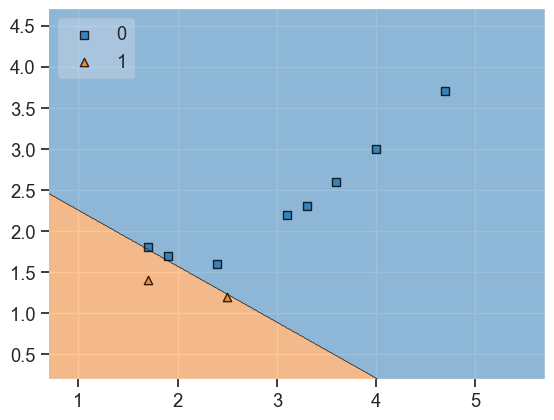

In [7]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test,y_pred.ravel(),clf=model, legend=2)

In [8]:
# sk-learns Model Prediction->
sk_mod=LogReg()
sk_mod.fit(X_train,y_train.ravel())
sk_pred=sk_mod.predict(X_test)
sk_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int64)

<Axes: >

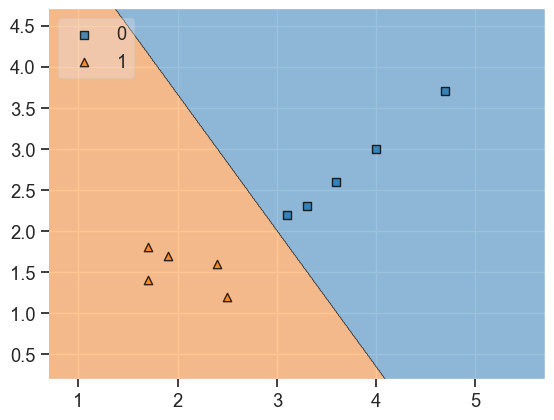

In [9]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test,sk_pred,clf=sk_mod, legend=2)

In [10]:
# Classification-reports for both models
my_report=classification_report(y_test,y_pred)
sk_report=classification_report(y_test,sk_pred)

print(f"My Report:\n{my_report}\n")
print(f"sk-learns Report:\n{sk_report}")

My Report:
              precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.50      0.17      0.25         6

    accuracy                           0.40        10
   macro avg       0.44      0.46      0.38        10
weighted avg       0.45      0.40      0.35        10


sk-learns Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.80      0.67      0.73         6

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



`Since this is not a really good-dataset to test logistic regression the values and acurracy fluctuate in every run. :(`